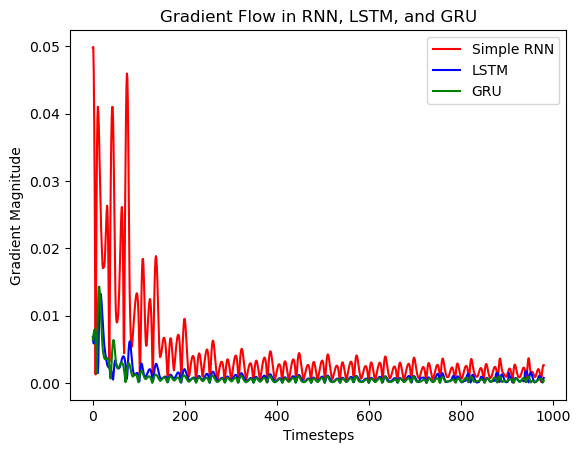

In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define models
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out)
        return out

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out)
        return out

class GRU(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(GRU, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out)
        return out

# Generate synthetic data (e.g., sine wave)
def generate_data(seq_length, num_samples):
    x = torch.linspace(0, 100, steps=num_samples)
    y = torch.sin(x)
    data = []
    for i in range(len(x) - seq_length):
        data.append((y[i:i+seq_length], y[i+1:i+seq_length+1]))
    return data

# Training and gradient recording
def train_and_record_gradients(model, data, seq_length):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    gradient_magnitudes = []

    for epoch in range(1):  # Train for 1 epoch to keep it simple
        for seq, target in data:
            optimizer.zero_grad()
            seq = seq.unsqueeze(0).unsqueeze(-1)  # Add batch and feature dimension
            target = target.unsqueeze(0).unsqueeze(-1)
            output = model(seq)
            loss = criterion(output, target)
            loss.backward()

            # Record gradient magnitudes for hidden states
            grads = []
            for name, param in model.named_parameters():
                if "weight_hh" in name:  # Hidden-to-hidden weights
                    grads.append(param.grad.abs().mean().item())
            gradient_magnitudes.append(grads)

            optimizer.step()

    return gradient_magnitudes

# Plot gradients
def plot_gradients(rnn_grads, lstm_grads, gru_grads, seq_length):
    timesteps = range(seq_length)
    plt.plot(timesteps, rnn_grads, label="Simple RNN", color="red")
    plt.plot(timesteps, lstm_grads, label="LSTM", color="blue")
    plt.plot(timesteps, gru_grads, label="GRU", color="green")
    plt.xlabel("Timesteps")
    plt.ylabel("Gradient Magnitude")
    plt.title("Gradient Flow in RNN, LSTM, and GRU")
    plt.legend()
    plt.show()

# Main execution
seq_length = 20
data = generate_data(seq_length, num_samples=1000)

# Initialize models
rnn = SimpleRNN(input_size=1, hidden_size=10)
lstm = LSTM(input_size=1, hidden_size=10)
gru = GRU(input_size=1, hidden_size=10)

# Train and record gradients
rnn_grads = train_and_record_gradients(rnn, data, seq_length)
lstm_grads = train_and_record_gradients(lstm, data, seq_length)
gru_grads = train_and_record_gradients(gru, data, seq_length)

# Plot the results
plot_gradients(rnn_grads, lstm_grads, gru_grads, 980)